In [1]:
%matplotlib inline
from IPython.display import HTML

In [2]:
HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
The raw code for this IPython notebook is by default hidden for easier reading.
To toggle on/off the raw code, click <a href="javascript:code_toggle()">here</a>.''')

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import seaborn as sns
from sklearn.datasets import load_boston

# Boston house-prices dataset 

In [4]:
# Load and return the boston house-prices dataset 
boston = load_boston()

df = pd.DataFrame(data = boston.data, columns = boston.feature_names)

df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


# Plot correlation matrix with seaborn

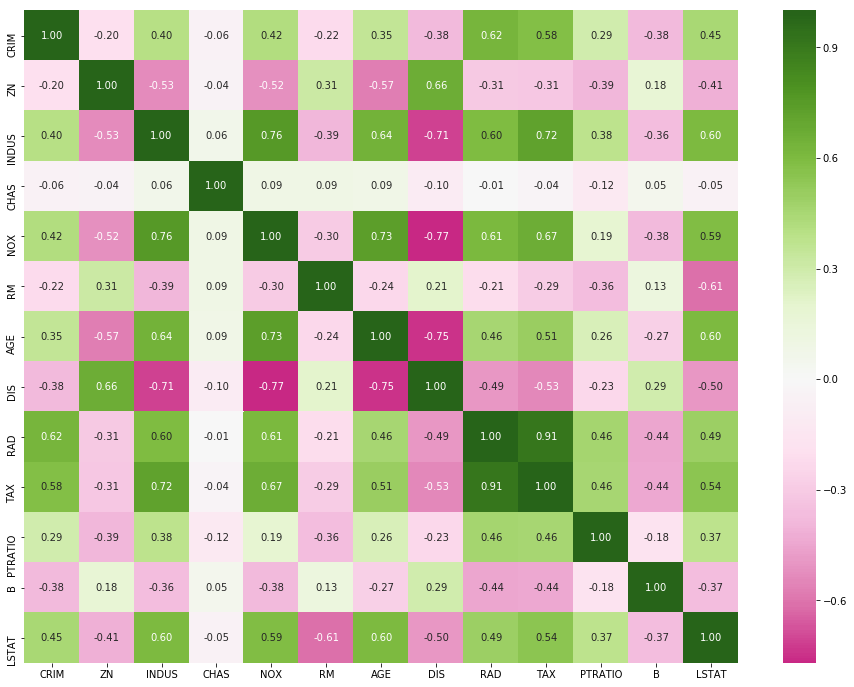

In [5]:
plt.figure(figsize = (16.0,12.0))
sns.heatmap(df.corr(),xticklabels= df.corr().columns.values,yticklabels=df.corr().columns.values, cmap = cm.PiYG, center = 0., annot = True, fmt = '.2f' )
plt.show()

# Plot interactive correlation matrix with plotly

In [6]:
import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go
import plotly.figure_factory as ff

In [7]:
def plot_correlation_matrix(corr, xcols = None, ycols = None, filename = None, title = None):
    # corr is the correlation matrix obtained from a dataframe using pandas
    
    if xcols == None:
        xcols = corr.columns.tolist()
    if ycols == None:
        ycols = corr.columns.tolist()
    
    layout = dict(
        title = title,
        width = 800,
        height = 800,
#        margin=go.Margin(l=100, r=10, b=50, t=50, pad=5),
        margin=go.Margin(l=250, r=50, b=50, t=250, pad=4),
        yaxis= dict(tickangle=-30,
                    side = 'left',
                    ),
        xaxis= dict(tickangle=-30,
                    side = 'top',
                    ),
    )
    fig = ff.create_annotated_heatmap(
        z=corr.values,
        x= xcols,
        y= ycols,
        colorscale='Portland',
        reversescale=True,
        showscale=True,
        font_colors = ['#efecee', '#3c3636'])
    fig['layout'].update(layout)
    
    if filename == None:
        filename = 'correlation matrix'
    return py.iplot(fig, filename= filename)

In [8]:
plot_correlation_matrix( df.corr().round(2) )